In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn import preprocessing
import scikitplot as skplt
import warnings

/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/scikitplot/plotters.py:33: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  warnings.warn("This module was deprecated in version 0.3.0 and its functions "


In [3]:
warnings.filterwarnings('ignore')

/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#Baseline prediction:  0.7486373556474343

In [5]:
scores = pd.DataFrame(columns=['Model', 'Training Accuracy Score', 'Test Accuracy Score', 'Mean CV Score', 'AUC'],
                     )

In [12]:
models = {'Decision Tree':[ 0.9410904338084272, 0.940689569330346, 0.9396278060428639, 0.9260894539790785],
          'Random Forest': [0.9724179530063335, 0.9282776772495476, 0.9230115293846929, 0.9963364242456345], 
          'KNN': [0.9622362606584925, 0.94865571321882, 0.9434399252521277, 0.9898582434855276], 
          'Naive Bayes': [0.8357689249581882, 0.8378022701102155, 0.8356729677607854, 0.8186033029545056], 
          'Neural Networks': [0.9186932799605187, 0.9183527992542633, 0.9193238739638355, 0.9659121888375225],
        'Logistic Regression - Ridge': [0.9148685328873413, 0.9165981246915611, 0.913895216480104, 0.9633526119128724] , 
          'Logistic Regression - Lasso': [0.9148411153455981, 0.9166529582716455, 0.9138677995021084, 0.9633274283807791],
         'Linear SVM': [0.8952649905409481, 0.894226024017108, 0.8809939305205725, 0.8461865818801445]}

In [13]:
model_df = pd.DataFrame(models).T
model_df

,0,1,2,3
Decision Tree,0.880309,0.883095,0.879582,0.814697
Random Forest,0.972418,0.928278,0.923012,0.996336
KNN,0.932772,0.910512,0.900653,0.980171
Naive Bayes,0.835769,0.837802,0.835673,0.818603
Neural Networks,0.918693,0.918353,0.919324,0.965912
Logistic Regression - Ridge,0.914869,0.916598,0.913895,0.963353
Logistic Regression - Lasso,0.914841,0.916653,0.913868,0.963327
Linear SVM,0.895265,0.894226,0.880994,0.846187


In [14]:
model_df = model_df.rename(columns = {0: 'Accuracy score - train', 1: 'Accuracy score - test',
                                     2: 'Mean CV Score', 3: 'AUC'})

In [21]:
model_df.round(3)

,Accuracy score - train,Accuracy score - test,Mean CV Score,AUC
Decision Tree,0.880,0.883,0.880,0.815
Random Forest,0.972,0.928,0.923,0.996
KNN,0.933,0.911,0.901,0.980
Naive Bayes,0.836,0.838,0.836,0.819
Neural Networks,0.919,0.918,0.919,0.966
Logistic Regression - Ridge,0.915,0.917,0.914,0.963
Logistic Regression - Lasso,0.915,0.917,0.914,0.963
Linear SVM,0.895,0.894,0.881,0.846


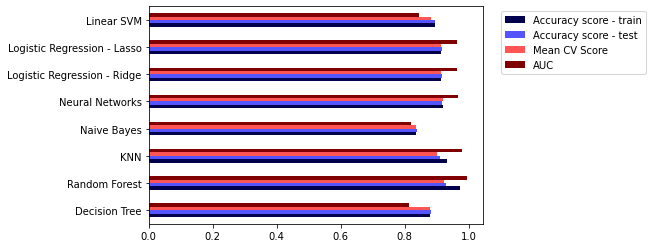

In [17]:
model_df.plot(kind='barh', colormap='seismic')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.savefig('model_score_comparison.png', dpi=300, bbox_inches = "tight")
plt.show();